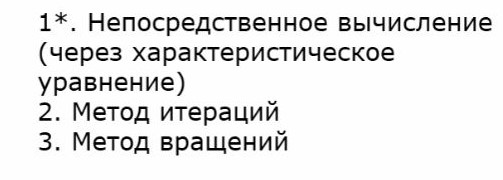

**1. Метод итераций**

In [12]:
import numpy as np

def power_iteration(A, num_simulations: int):
    x = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        y = np.dot(A, x)
        x_new = y / np.linalg.norm(y)

        if np.linalg.norm(x_new - x) < 1e-6:
            break

        x = x_new

    eigenvalue = np.dot(x_new, np.dot(A, x_new)) / np.dot(x_new, x_new)

    return x_new, eigenvalue


A = np.array([[2,-1,1],
              [-1,2,-1],
              [0,0,1]])
eigenvalue, eigenvector = power_iteration(A, 1000)
print(f"Собственное число: {eigenvector}")
print(f"Собственный вектор: {eigenvalue}")

Собственное число: 3.000000032852014
Собственный вектор: [ 7.07106911e-01 -7.07106651e-01  2.32299302e-08]


**2. Метод вращений**

In [15]:
import numpy as np

def jacobi_rotation(matrix, tolerance=1e-6, max_iterations=1000):
    n = matrix.shape[0]
    eigenvectors = np.eye(n)

    for _ in range(max_iterations):
        max_value = -np.inf
        p, q = 0, 0

        for i in range(n):
            for j in range(i + 1, n):
                if abs(matrix[i, j]) > max_value:
                    max_value = abs(matrix[i, j])
                    p, q = i, j

        if max_value < tolerance:
            break

        d = np.sqrt((matrix[p, p] - matrix[q, q])**2 + 4 * matrix[p, q]**2)
        c = np.sqrt(0.5 * (1 + abs(matrix[p, p] - matrix[q, q]) / d))
        s = np.sign(matrix[p, q] * (matrix[p, p] - matrix[q, q])) * np.sqrt(0.5 * (1 - abs(matrix[p, p] - matrix[q, q]) / d))

        rotation_matrix = np.eye(n)
        rotation_matrix[p, p] = c
        rotation_matrix[q, q] = c
        rotation_matrix[p, q] = s
        rotation_matrix[q, p] = -s

        matrix = rotation_matrix.T @ matrix @ rotation_matrix
        eigenvectors = eigenvectors @ rotation_matrix

    eigenvalues = np.diag(matrix)
    eigenvectors = eigenvectors

    return eigenvalues, eigenvectors

A = np.array([[5, 1, 2], [1, 4, 1], [2, 1, 3]])

eigenvalues, eigenvectors = jacobi_rotation(A)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[4.26780385 1.70760233 6.02459382]

Eigenvectors:
[[ 0.02178499  0.4736873   0.88042363]
 [-0.98288976  0.17125519 -0.06781868]
 [-0.18290196 -0.86388194  0.46931319]]
